In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


In [2]:
# Importing Libraries needed for this project 
import warnings
import numpy as np 
import pandas as pd
import xgboost as xgb
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset into our notebook 
df = pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# `DATA PREPROCESSING`

In [5]:
# Returning the columns in the dataset 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Returning the shape of the dataset 
df.shape

(303, 14)

In [7]:
# Describing the dataset 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Returning the info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Checking for missing values in the dataset 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Returning duplicates if (any)
df.duplicated().sum()

1

In [11]:
# Dropping duplicated columns 
df.drop_duplicates(inplace=True)

In [12]:
# Checking to see there is any more 
df.duplicated().sum()

0

# `EXPLORATORY DATA ANALYSIS`

# ~UNIVARIATE ANALYSIS~

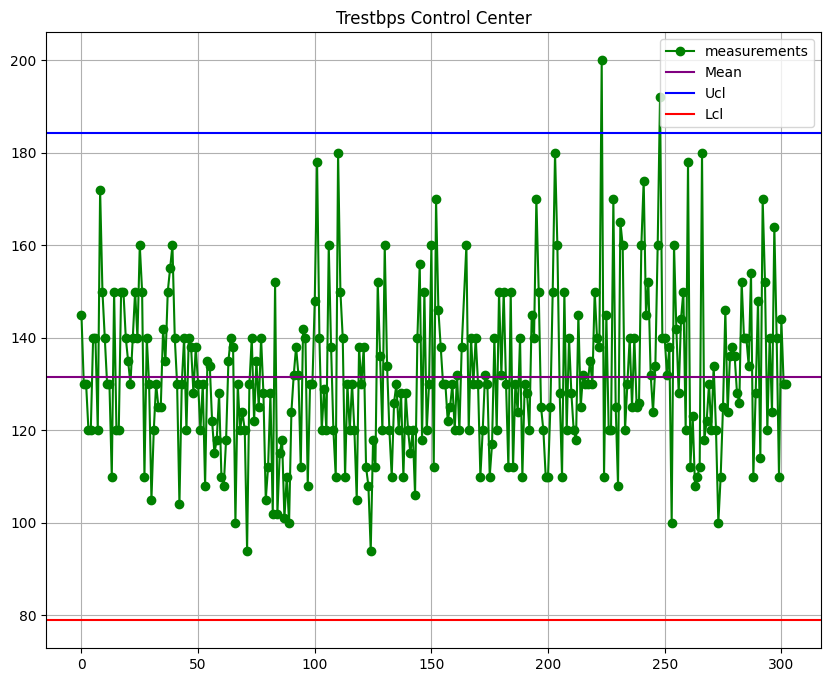

In [13]:
# ANALYSING SINGLE FEATURES (Diagnostic Data Analysis)

mean = df["trestbps"].mean()
std = df["trestbps"].std()
ucl = mean + 3*std  # Upper control limit
lcl = mean - 3*std  # Lower control limit 

plt.figure(figsize=(10,8))
plt.plot(df["trestbps"],marker="o",label="measurements",color="green")
plt.axhline(mean,color="purple",label="Mean")
plt.axhline(ucl,color="blue",label="Ucl")
plt.axhline(lcl,color="red",label="Lcl")
plt.title("Trestbps Control Center")
plt.grid(True)
plt.legend()
plt.show()

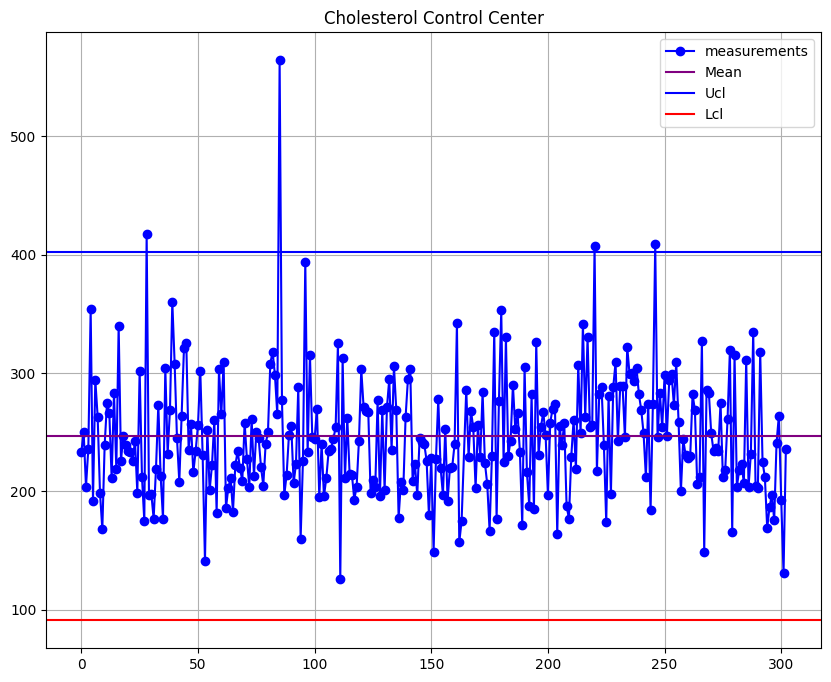

In [14]:
# Analysing the cholesterol feature 

mean = df["chol"].mean()
std = df["chol"].std()
ucl = mean + 3*std  # Upper control limit
lcl = mean - 3*std  # Lower control limit 

plt.figure(figsize=(10,8))
plt.plot(df["chol"],marker="o",label="measurements",color="blue")
plt.axhline(mean,color="purple",label="Mean")
plt.axhline(ucl,color="blue",label="Ucl")
plt.axhline(lcl,color="red",label="Lcl")
plt.title("Cholesterol Control Center")
plt.grid(True)
plt.legend()
plt.show()

# ~MULTIVARIATE ANALYSIS~

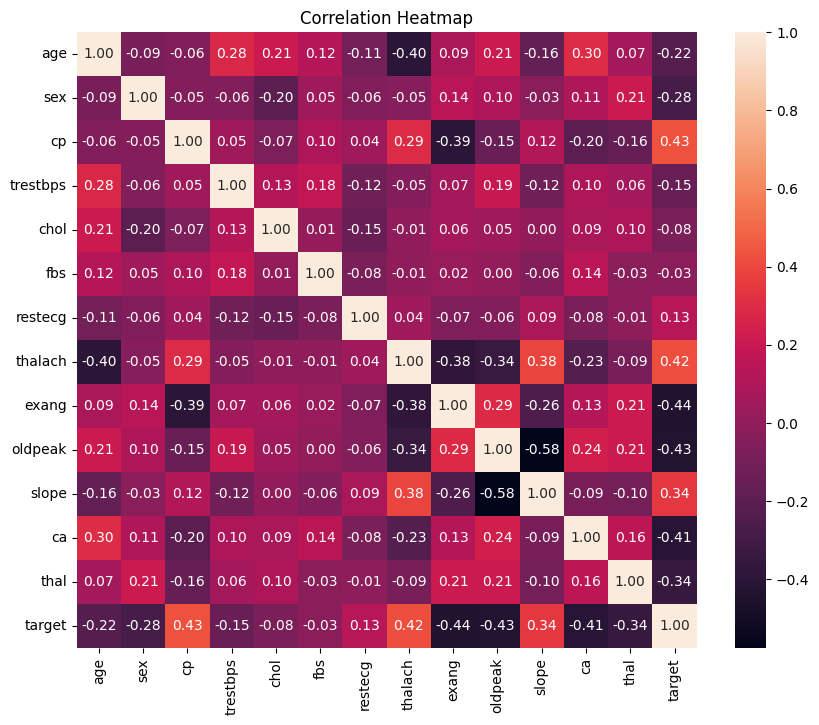

In [15]:
# Correlation between features 
corr = df.corr(method="pearson")

# Plotting the correlation heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f",color="blue")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Printing out the initial correlation 
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [17]:
# Training our model

X = df.drop("target",axis=1)   #splitting our data into (25%) training and testing (75%)
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
# Training our models 
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xb = xgb.XGBClassifier()
dt = DecisionTreeClassifier()

#Classifiers
rf_clf = rf.fit(X_train,y_train)
gb_clf = gb.fit(X_train,y_train)
xb_clf = xb.fit(X_train,y_train)
dt_clf = dt.fit(X_train,y_train)

#Prediction
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
xb_pred = xb_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)

#printing a classification report to see the best performing model 
rf_class = classification_report(rf_pred,y_test)
gb_class = classification_report(gb_pred,y_test)
xb_class = classification_report(xb_pred,y_test)
dt_class = classification_report(dt_pred,y_test)

#Returning the output 
print(f"RandomForest Classification Report: {rf_class}\n\n GradientBoosting Classification Report:{gb_class}\n\n Extreme GradientBoosting Classification Report:{xb_class}\n\n DecisionTree Classification Report:{dt_class}")


RandomForest Classification Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76


 GradientBoosting Classification Report:              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.78      0.86      0.82        37

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76


 Extreme GradientBoosting Classification Report:              precision    recall  f1-score   support

           0       0.77      0.77      0.77        35
           1       0.80      0.80      0.80        41

    accuracy                           0.79        76
  

### Hence we can say randomforest (86) and gradient boosting (82) are the two best performing model according to their accuracy score 


# FEATURE ENGINEERING 

In [19]:
# creating the feature names form the columns 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# ~FEATURE IMPORTANCE~

In [20]:
# Using the feature importance method to select features that significatly describes the target

model1  = RandomForestClassifier(n_estimators=100,random_state=42)
model2 = GradientBoostingClassifier(n_estimators=100,random_state=42)
model3 = xgb.XGBClassifier(n_estimators=100,random_state=42)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

rf_importance = model1.feature_importances_
gb_importance = model2.feature_importances_
xb_importance = model3.feature_importances_

#Creating a dataframe for each model 
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

feature_importance1 = pd.DataFrame({"Feature_importance":feature_names,"RF Importance":rf_importance})
feature_importance2 = pd.DataFrame({"Feature_Importance":feature_names,"GB Importance":gb_importance})
feature_importance3 = pd.DataFrame({"Feature_Importance":feature_names,"XB Importance":xb_importance})

# Sorting the values in the dataframe by order 

feature_importance1 = feature_importance1.sort_values("RF Importance",ascending=True)
feature_importance2 = feature_importance2.sort_values("GB Importance",ascending=True)
feature_importance3 = feature_importance3.sort_values("XB Importance",ascending=True)


In [21]:
# printing the outputs to see the features with the most relevance to the dataset 
feature_importance1

,Feature_importance,RF Importance
5,fbs,0.007968
6,restecg,0.021980
1,sex,0.030557
10,slope,0.047120
8,exang,0.052905
3,trestbps,0.069504
4,chol,0.074045
0,age,0.093728
12,thal,0.103937
9,oldpeak,0.116456


In [22]:
feature_importance2

,Feature_Importance,GB Importance
5,fbs,0.008179
6,restecg,0.017226
1,sex,0.025126
3,trestbps,0.039629
8,exang,0.039757
10,slope,0.043194
7,thalach,0.049459
4,chol,0.050831
0,age,0.089276
9,oldpeak,0.100270


In [23]:
feature_importance3

,Feature_Importance,XB Importance
4,chol,0.028749
6,restecg,0.030795
3,trestbps,0.031764
7,thalach,0.035280
0,age,0.044660
9,oldpeak,0.051626
5,fbs,0.052293
1,sex,0.055801
10,slope,0.059745
8,exang,0.114437


# ~FEATURE SELECTION~

In [24]:
# Using SelectKBest and chi 2

selector = SelectKBest(chi2,k=6)
X_selector = selector.fit(X,y)
feature_selection = X.columns[selector.get_support()]
print(f"The top 6 Features after feature selection are:\n\n{feature_selection}")

The top 6 Features after feature selection are:

Index(['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')


# DATA VISUALIZATION

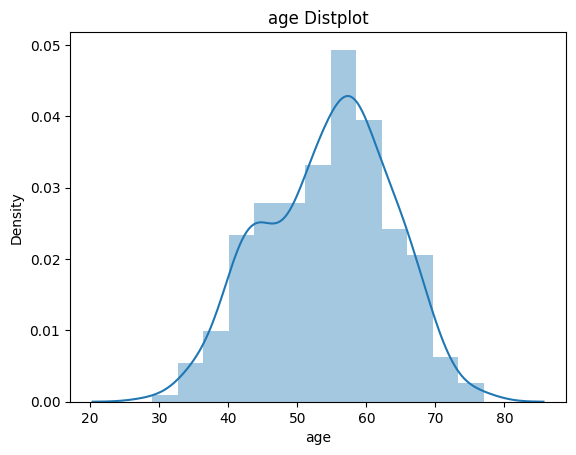

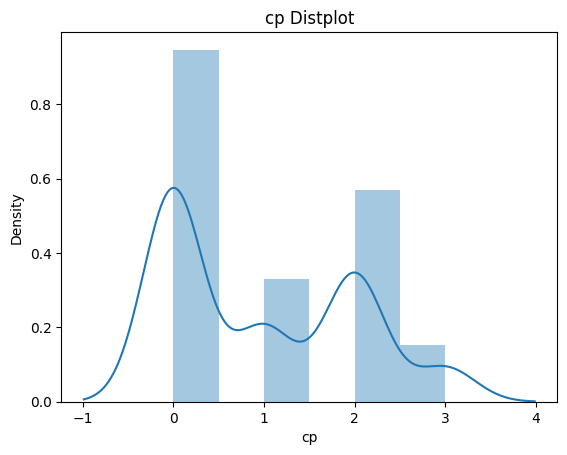

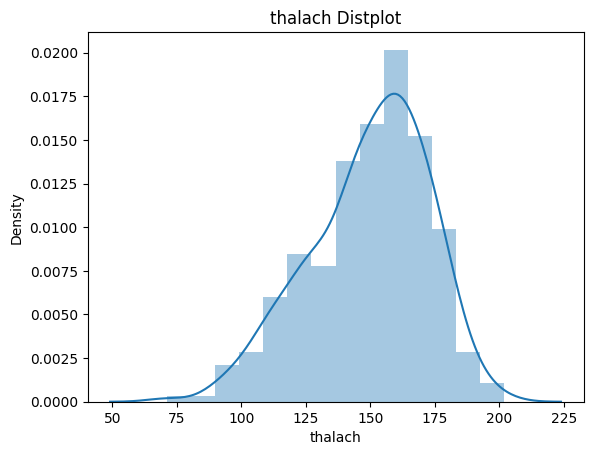

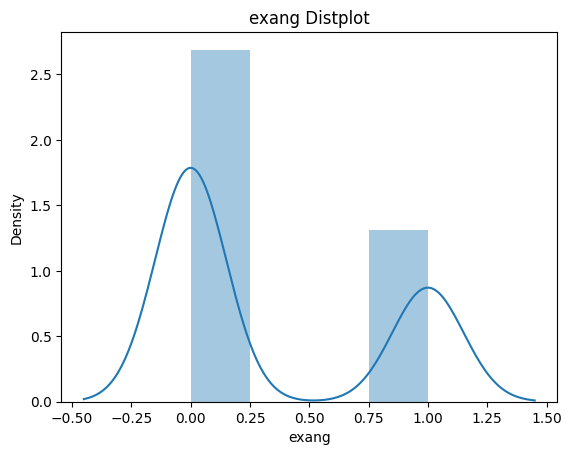

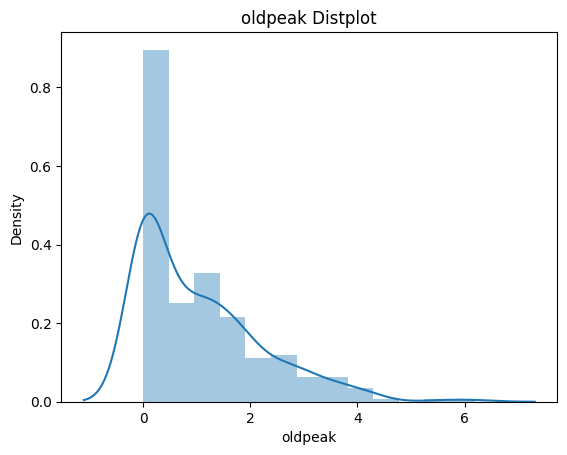

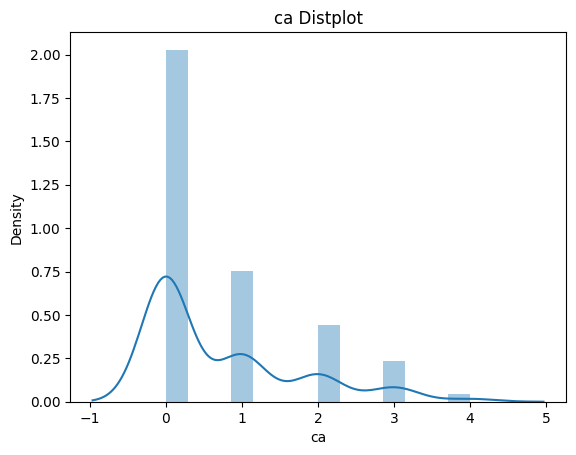

In [25]:
# Creating a density plot for the selected features 
selected_features = df[['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca']]
for i,col in enumerate(selected_features):
    plt.figure(i)
    sns.distplot(selected_features[col])
    plt.title(f"{col} Distplot")

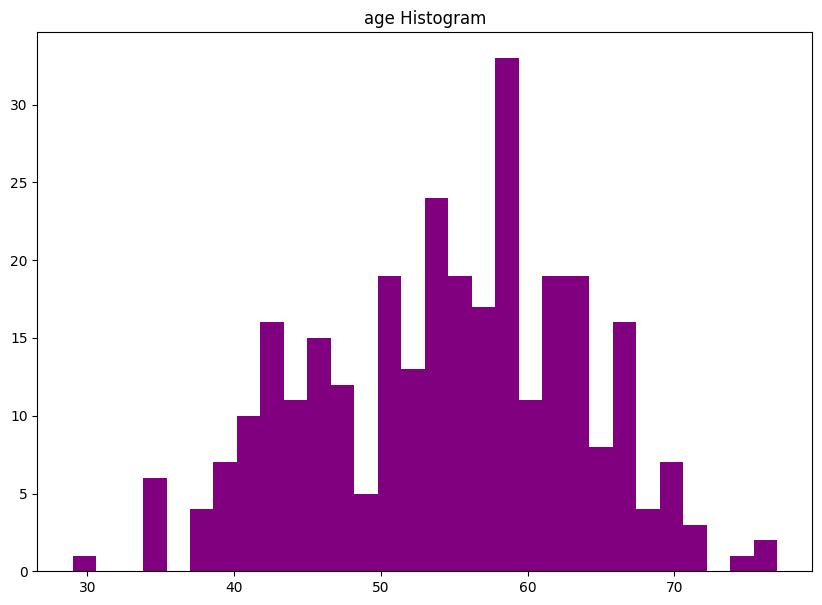

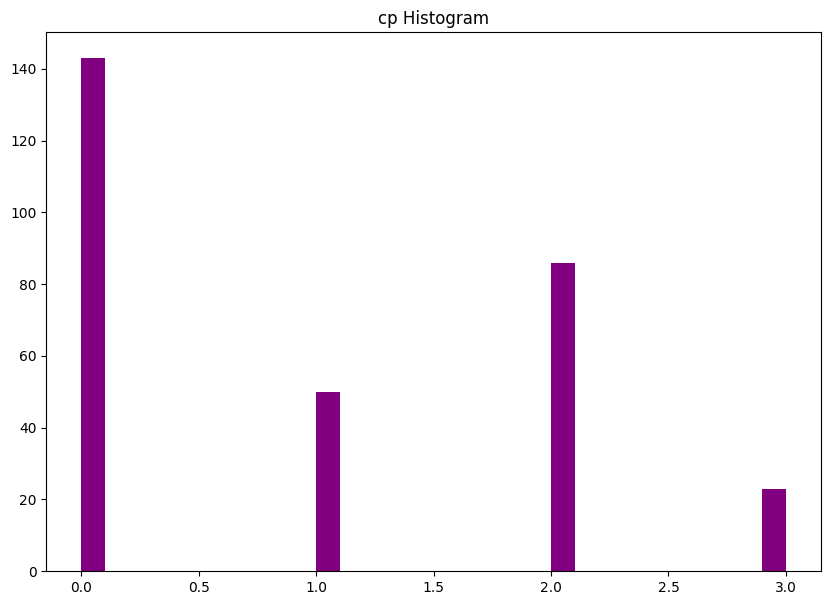

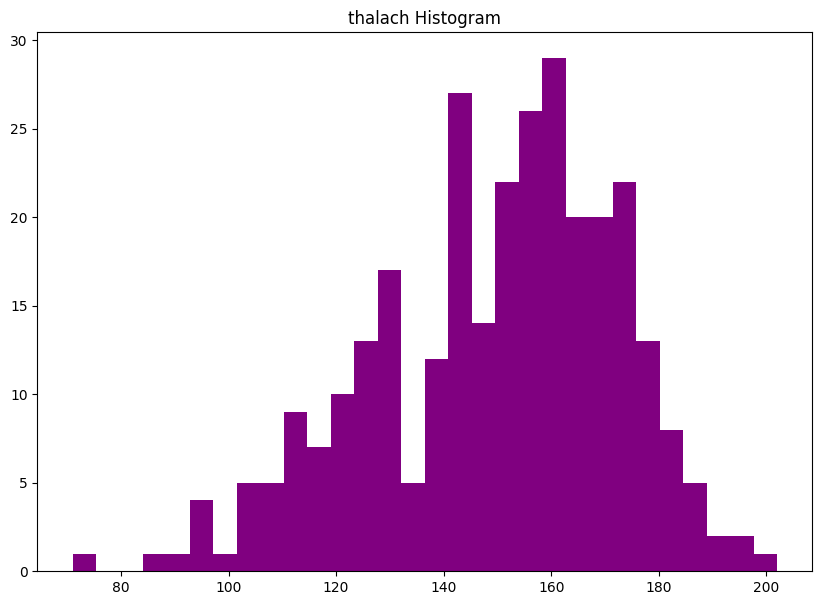

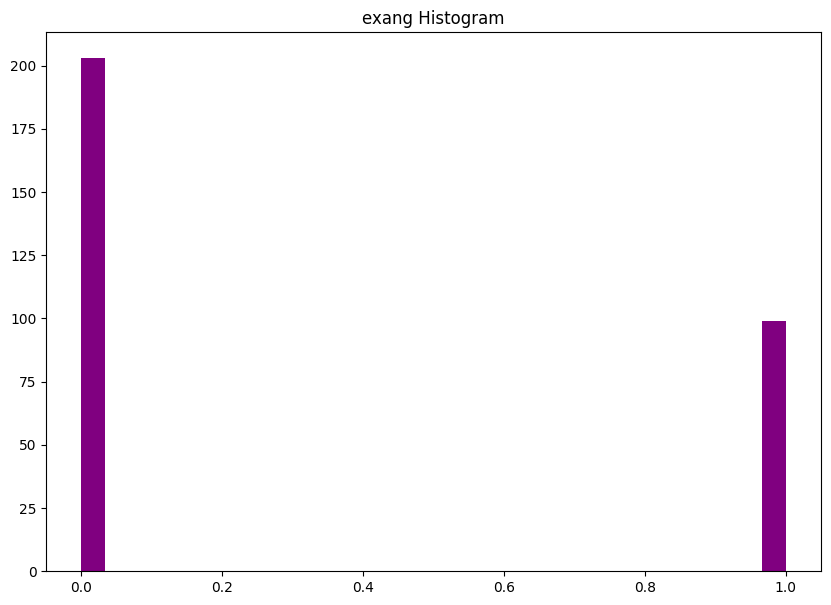

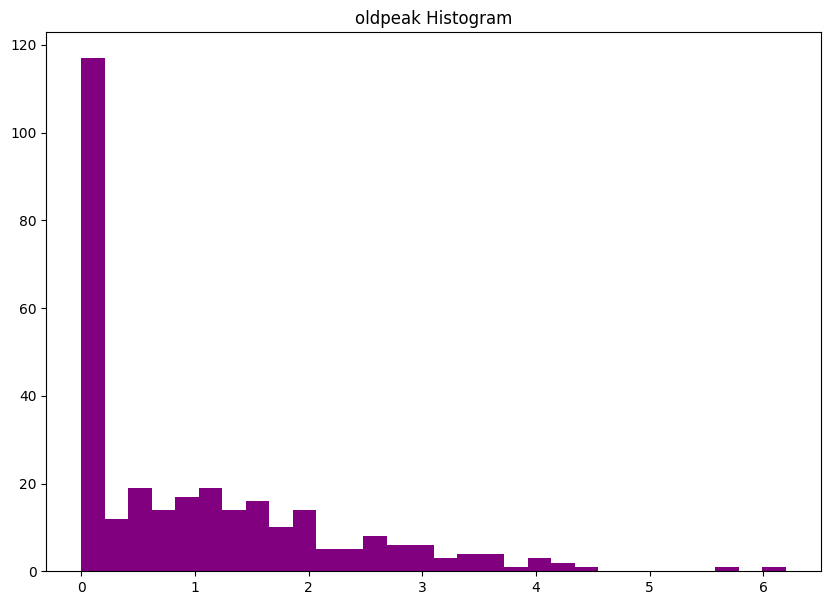

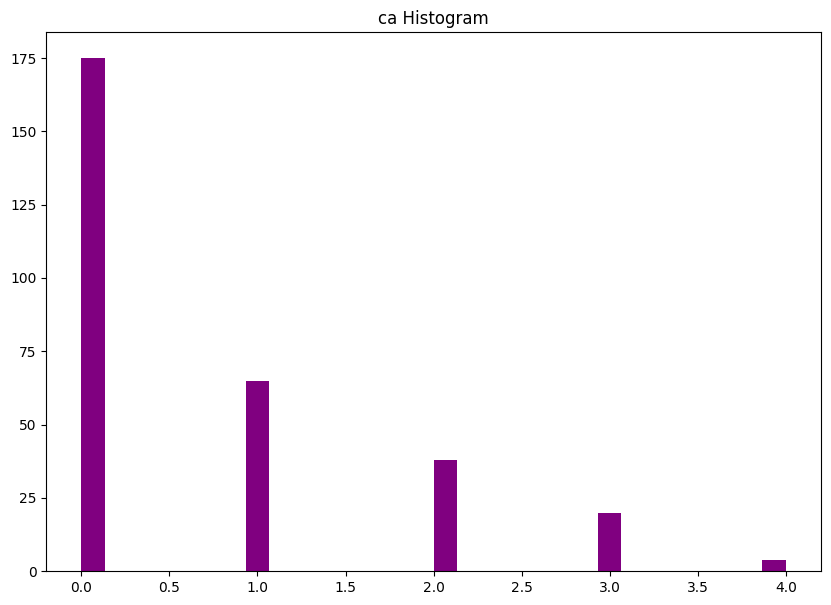

In [26]:
# Creating an histogarm chart using the selected features 
for feature in selected_features.columns:
    if feature in df.columns:
        plt.figure(figsize=(10,7))
        plt.hist(selected_features[feature],bins=30,color="purple")
        plt.title(f"{feature} Histogram")
        plt.show()
    else:
        print("Features Not Found in df.columns")

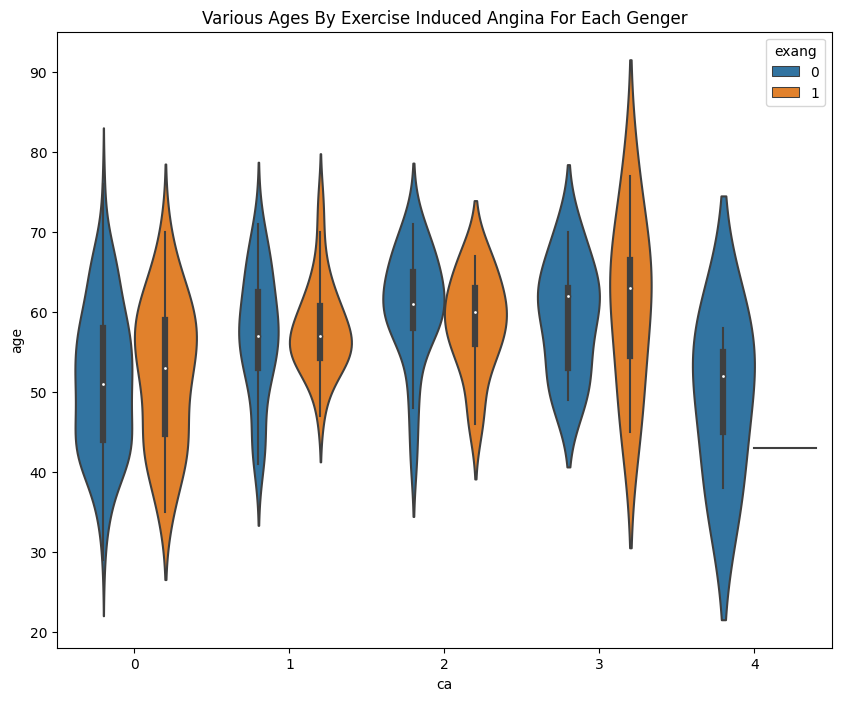

In [27]:
# comparing features using violinplot 
plt.figure(figsize=(10,8))
sns.violinplot(x=selected_features["ca"],y=selected_features["age"],hue="exang",data=selected_features)
plt.title("Various Ages By Exercise Induced Angina For Each Genger")
plt.show()

In [28]:
# Cross Tabulation 
ct = pd.crosstab(selected_features['cp'],selected_features['thalach'])
ct

thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
cp,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,0,1,1,3,1,...,0,1,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,1
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


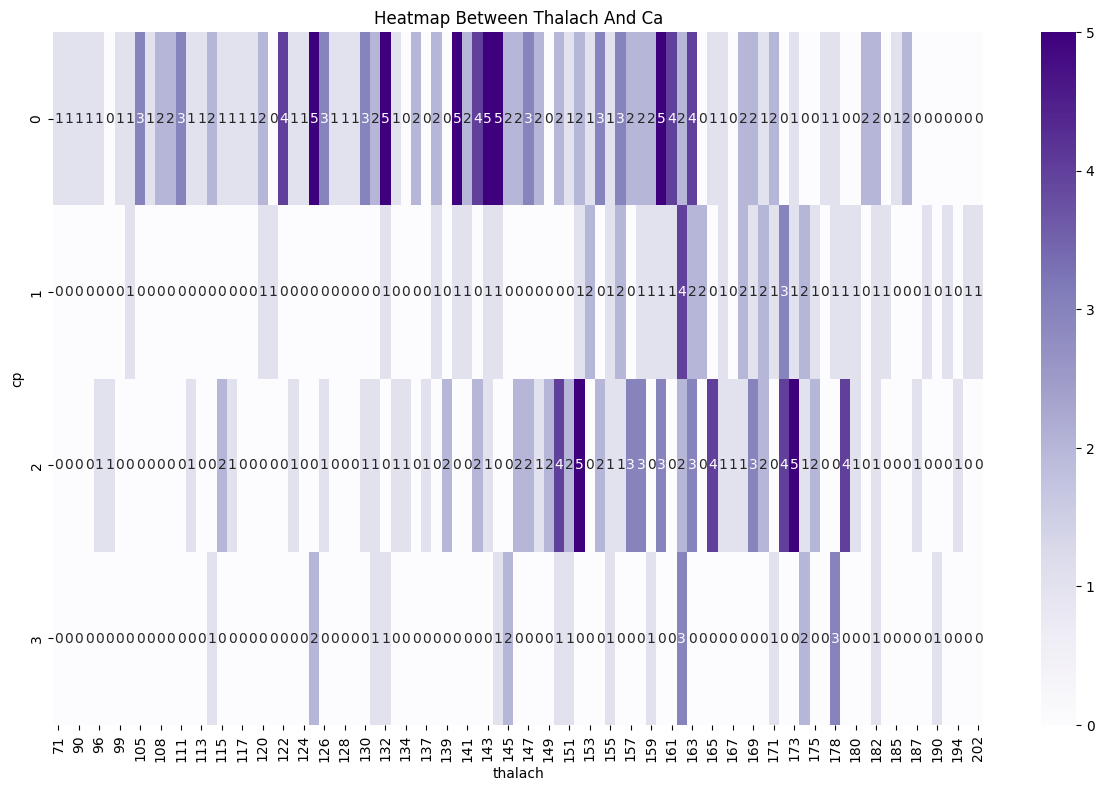

In [29]:
# Ploting the heatmap of the distribution 
plt.figure(figsize=(15,9))
sns.heatmap(ct,annot=True,fmt='d',cmap="Purples")
plt.title('Heatmap Between Thalach And Ca')
plt.show()

In [30]:
# Visualizing the various model accuracy
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(rf_pred,y_test)
gb_acc = accuracy_score(gb_pred,y_test)
xb_acc = accuracy_score(xb_pred,y_test)

print(f"RandomForest Accuracy:\n\n{rf_acc*100}\n\n GradientBoosting Accuracy:\n\n{gb_acc*100}\n\n Extreme GradientBoosting:\n\n{xb_acc*100}")

RandomForest Accuracy:

86.8421052631579

 GradientBoosting Accuracy:

81.57894736842105

 Extreme GradientBoosting:

78.94736842105263


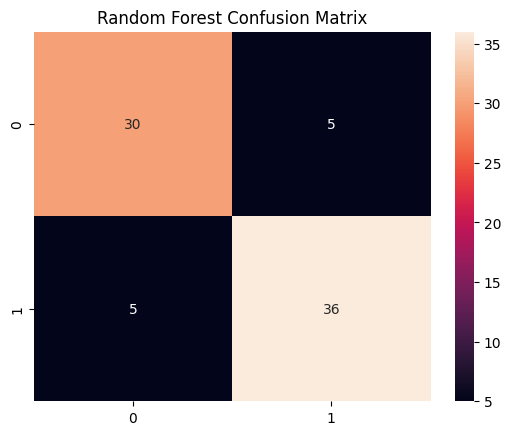

---------------------------------------------------------------------------


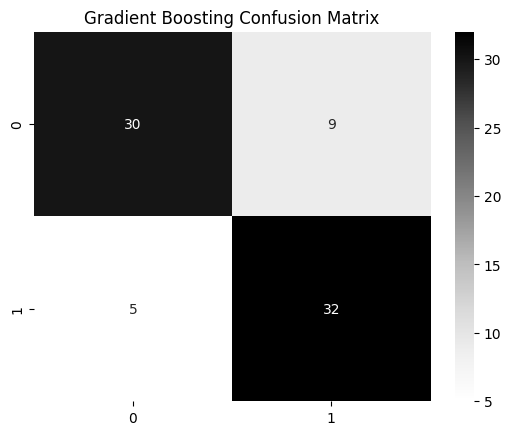

---------------------------------------------------------------------------


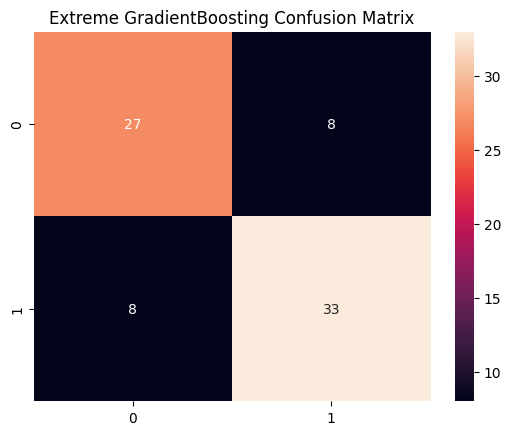

---------------------------------------------------------------------------


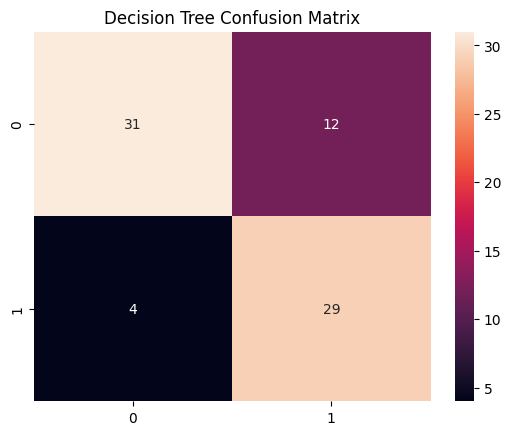

In [31]:
# Confusion Matrix
rf_confm = confusion_matrix(rf_pred,y_test)
gb_confm = confusion_matrix(gb_pred,y_test)
xb_confm = confusion_matrix(xb_pred,y_test)
dt_confm = confusion_matrix(dt_pred,y_test)
# Confusion matrix heatmap plot
sns.heatmap(rf_confm,annot=True,cmap=None)
plt.title("Random Forest Confusion Matrix")
plt.show()
print("---------------------------------------------------------------------------")
sns.heatmap(gb_confm,annot=True,cmap="Greys")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()
print("---------------------------------------------------------------------------")
sns.heatmap(xb_confm,annot=True,color="blue")
plt.title("Extreme GradientBoosting Confusion Matrix")
plt.show()
print("---------------------------------------------------------------------------")
sns.heatmap(dt_confm,annot=True,cmap=None)
plt.title("Decision Tree Confusion Matrix")
plt.show()

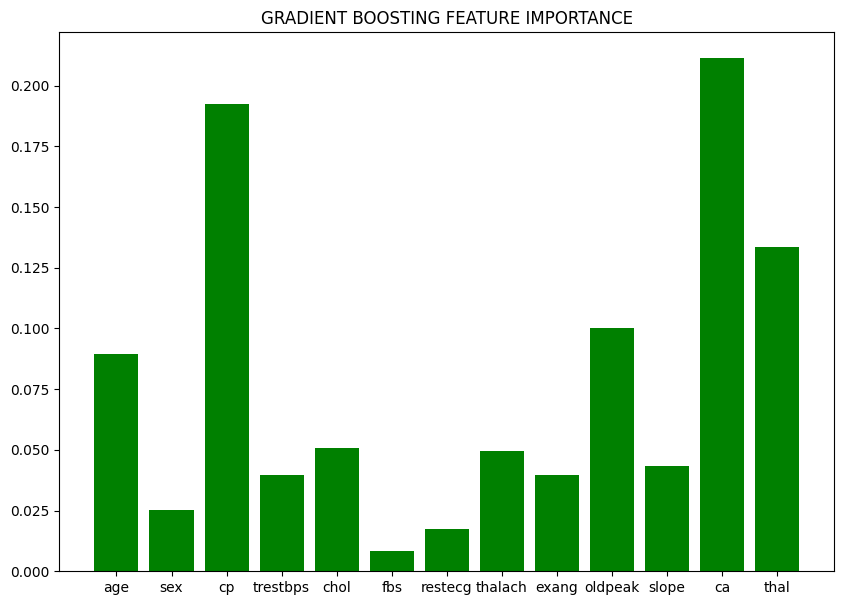

In [32]:
# Plotting the feature importance according to GradientBoosting with matplotlib 
plt.figure(figsize=(10,7))
plt.bar(feature_names,gb_importance,color="green")
plt.title("GRADIENT BOOSTING FEATURE IMPORTANCE")
plt.show()

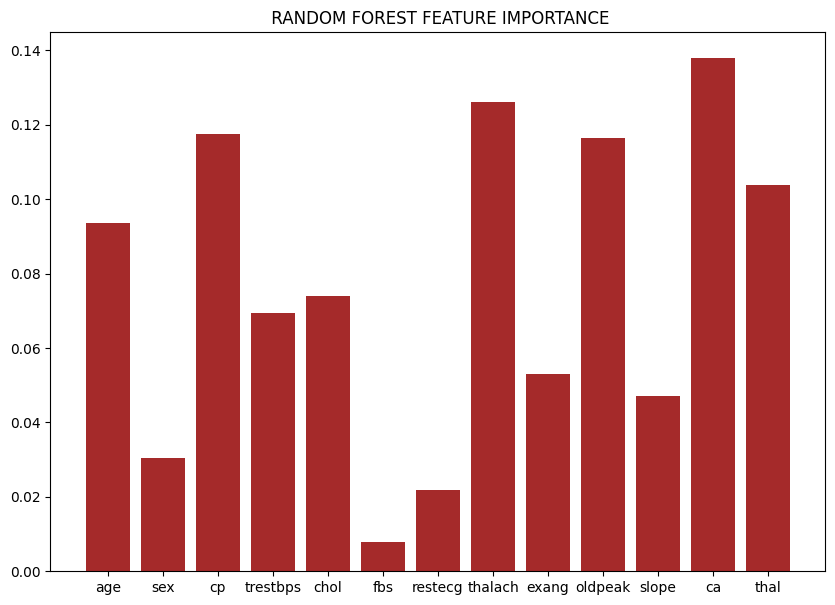

In [33]:
# Plotting the feature importance according to randomforest with matplotlib 
plt.figure(figsize=(10,7))
plt.bar(feature_names,rf_importance,color="brown")
plt.title(" RANDOM FOREST FEATURE IMPORTANCE")
plt.show()

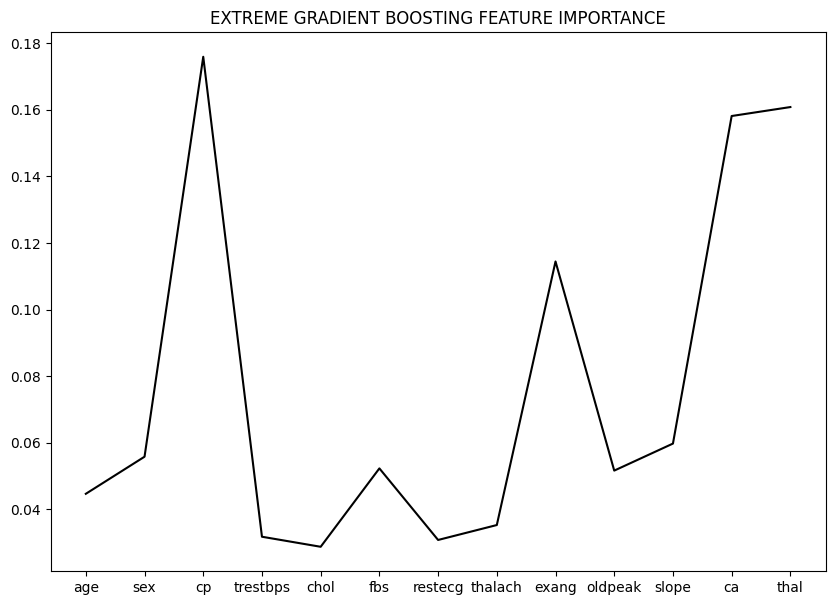

In [34]:
# Plotting the feature importance according to extreme gradientboosting with matplotlib 
plt.figure(figsize=(10,7))
plt.plot(feature_names,xb_importance,color="black")
plt.title("EXTREME GRADIENT BOOSTING FEATURE IMPORTANCE")
plt.show()

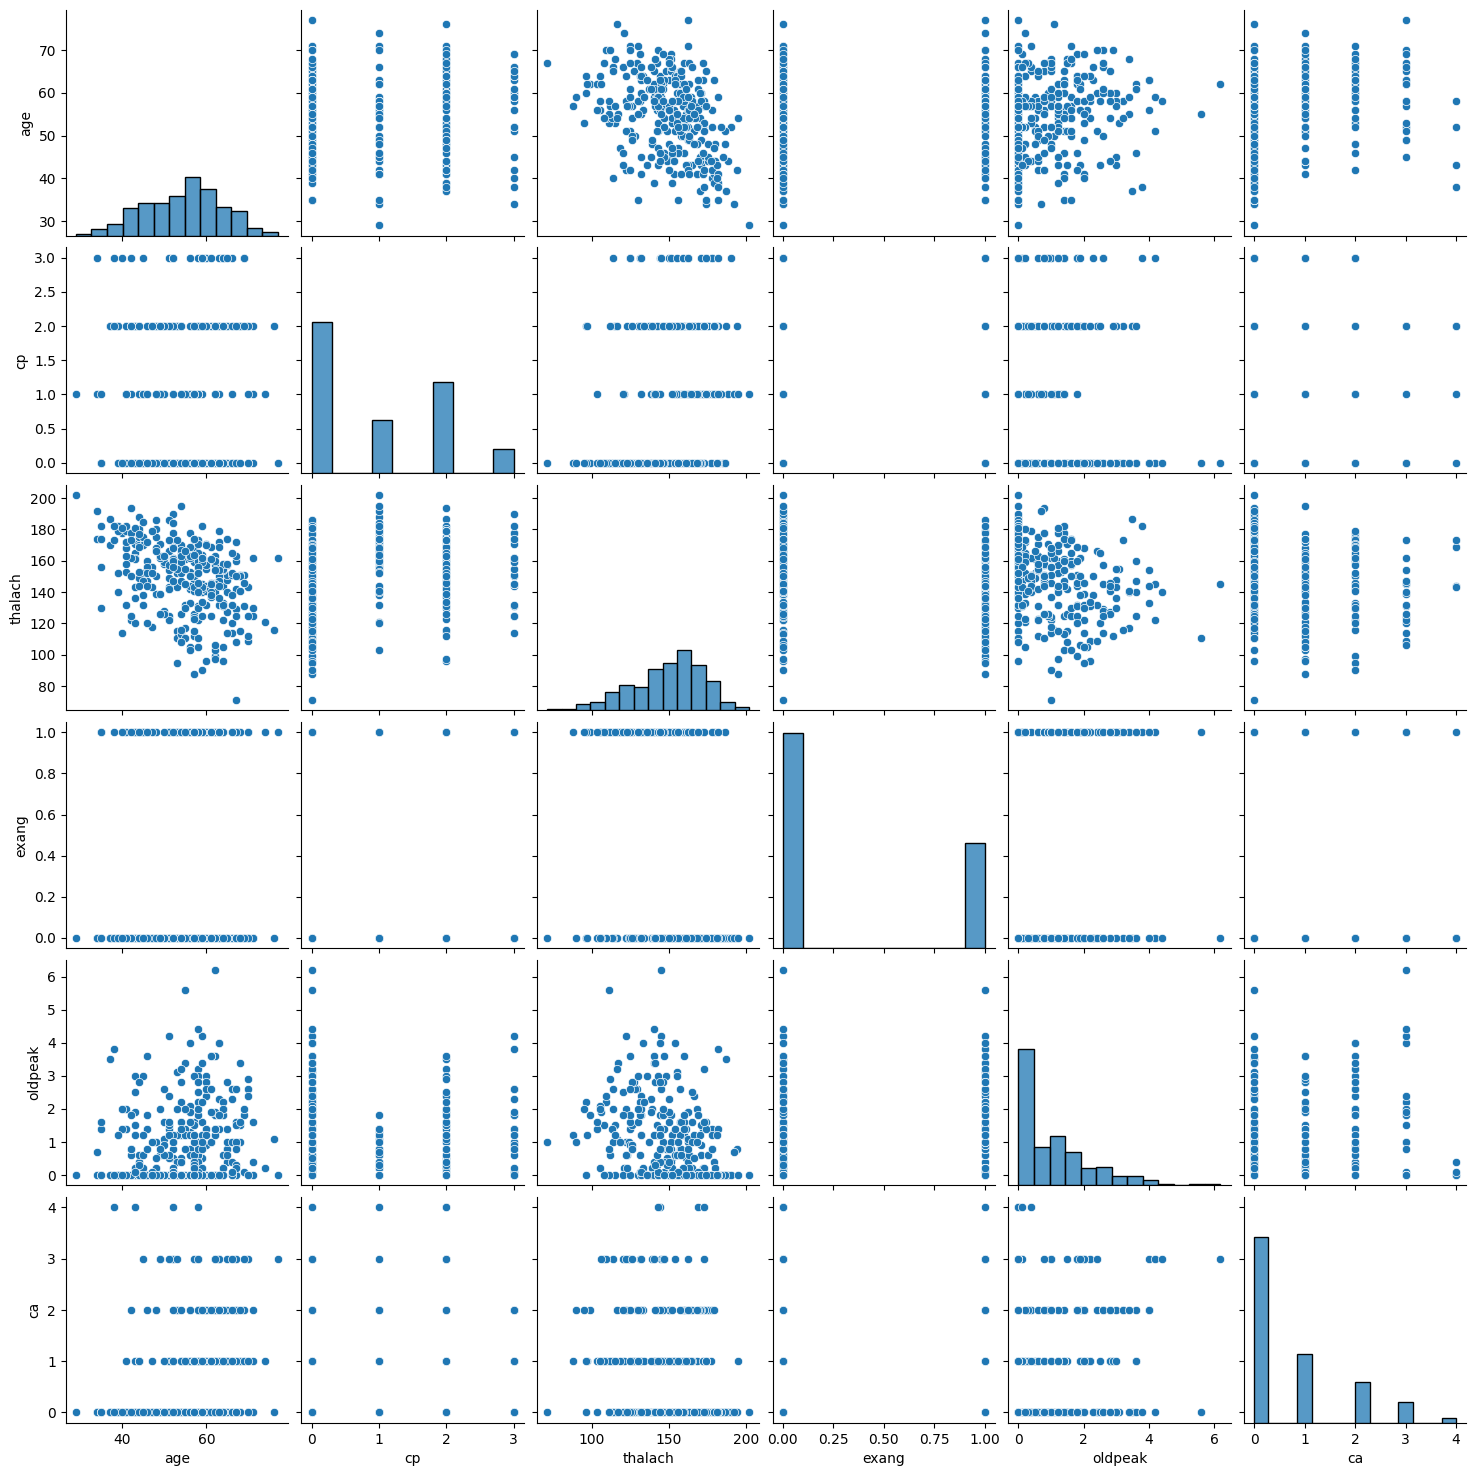

In [35]:
# Plotting the pairplot of the selected features
sns.pairplot(selected_features)

# ~THE END~